In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cmap = 'RdPu'

In [13]:
df = pd.read_csv('heart_health.csv')

In [14]:
df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [15]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Height(cm)', 'Weight(kg)',
       'Blood Pressure(mmHg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Smoker', 'Exercise(hours/week)', 'Heart Attack'],
      dtype='object')

In [16]:
df.shape

(724, 12)

In [17]:
df.dtypes

ID                       int64
Name                    object
Age                      int64
Gender                  object
Height(cm)               int64
Weight(kg)               int64
Blood Pressure(mmHg)    object
Cholesterol(mg/dL)       int64
Glucose(mg/dL)           int64
Smoker                  object
Exercise(hours/week)     int64
Heart Attack             int64
dtype: object

In [18]:
# Checking for Nulls
df.isnull().sum()

ID                      0
Name                    0
Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Blood Pressure(mmHg)    0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
dtype: int64

In [20]:
df.describe()

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.712707,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,207.901609,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,1.000000,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,181.750000,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,362.500000,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,543.250000,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


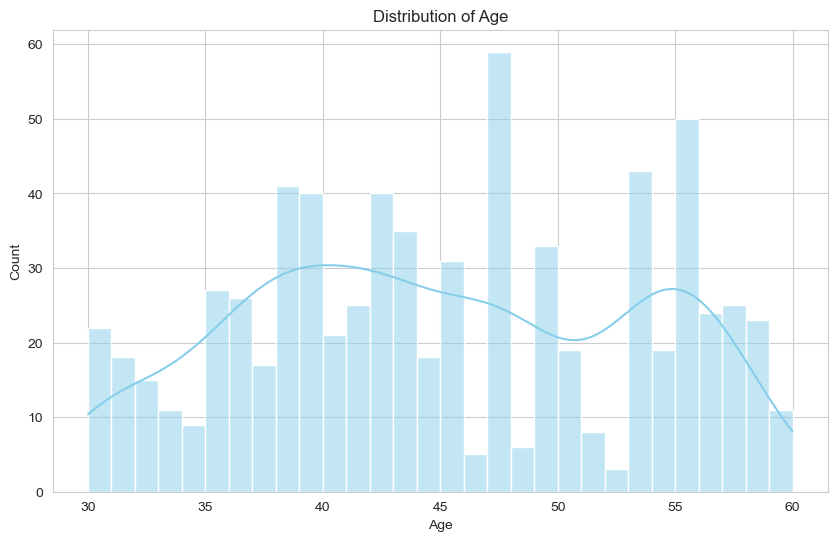

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

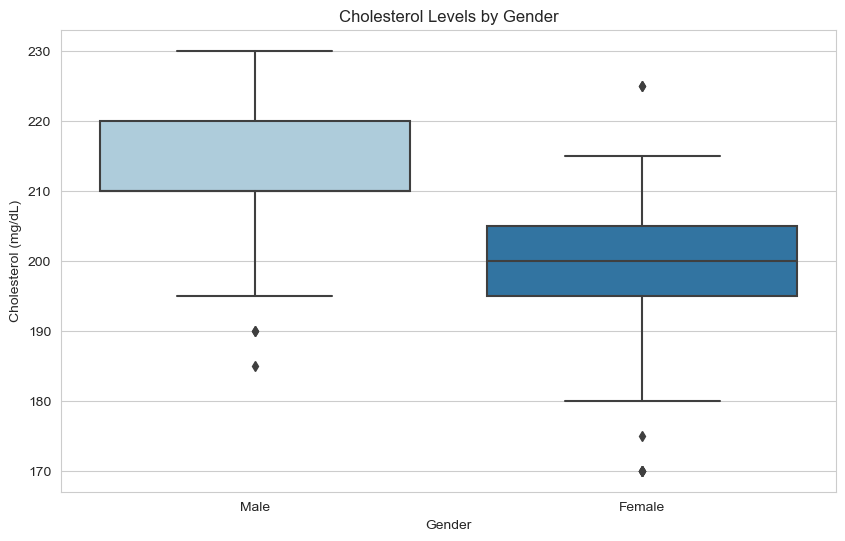

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Cholesterol(mg/dL)", palette="Paired")
plt.title('Cholesterol Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

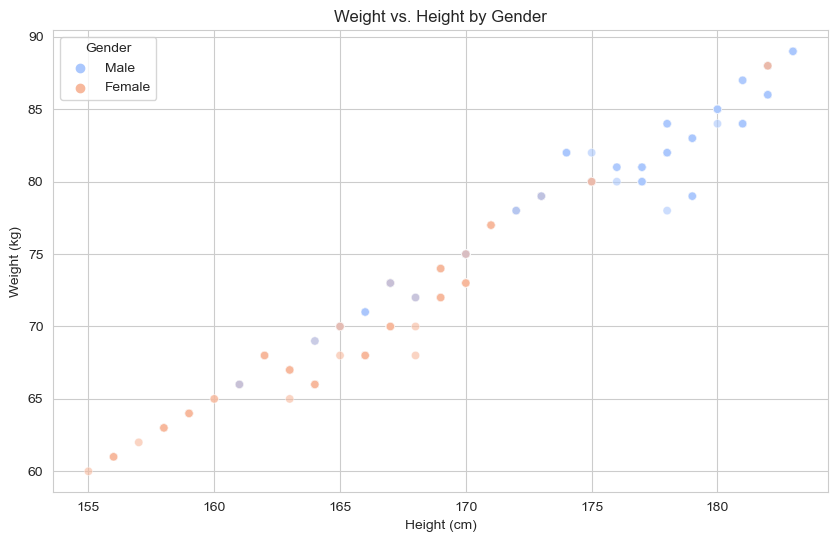

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Height(cm)", y="Weight(kg)", hue="Gender", palette="coolwarm", alpha=0.6)
plt.title('Weight vs. Height by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [31]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df['Blood Pressure(mmHg)'] = df['Blood Pressure(mmHg)'].str.replace('/','').astype(int)

df['Smoker'] = df['Smoker'].map({'No': 0, 'Yes': 1})

df = df.drop('Name', axis=1)


In [33]:
df.dtypes

ID                      int64
Age                     int64
Gender                  int64
Height(cm)              int64
Weight(kg)              int64
Blood Pressure(mmHg)    int64
Cholesterol(mg/dL)      int64
Glucose(mg/dL)          int64
Smoker                  int64
Exercise(hours/week)    int64
Heart Attack            int64
dtype: object

In [34]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['ID'], axis=1))  # Drop the 'ID' column for clustering

kmeans = KMeans(n_clusters=3, random_state=42)  # I want 3 clusters for the risk categories
kmeans.fit(scaled_features)

clusters = kmeans.labels_

df['Cluster'] = clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

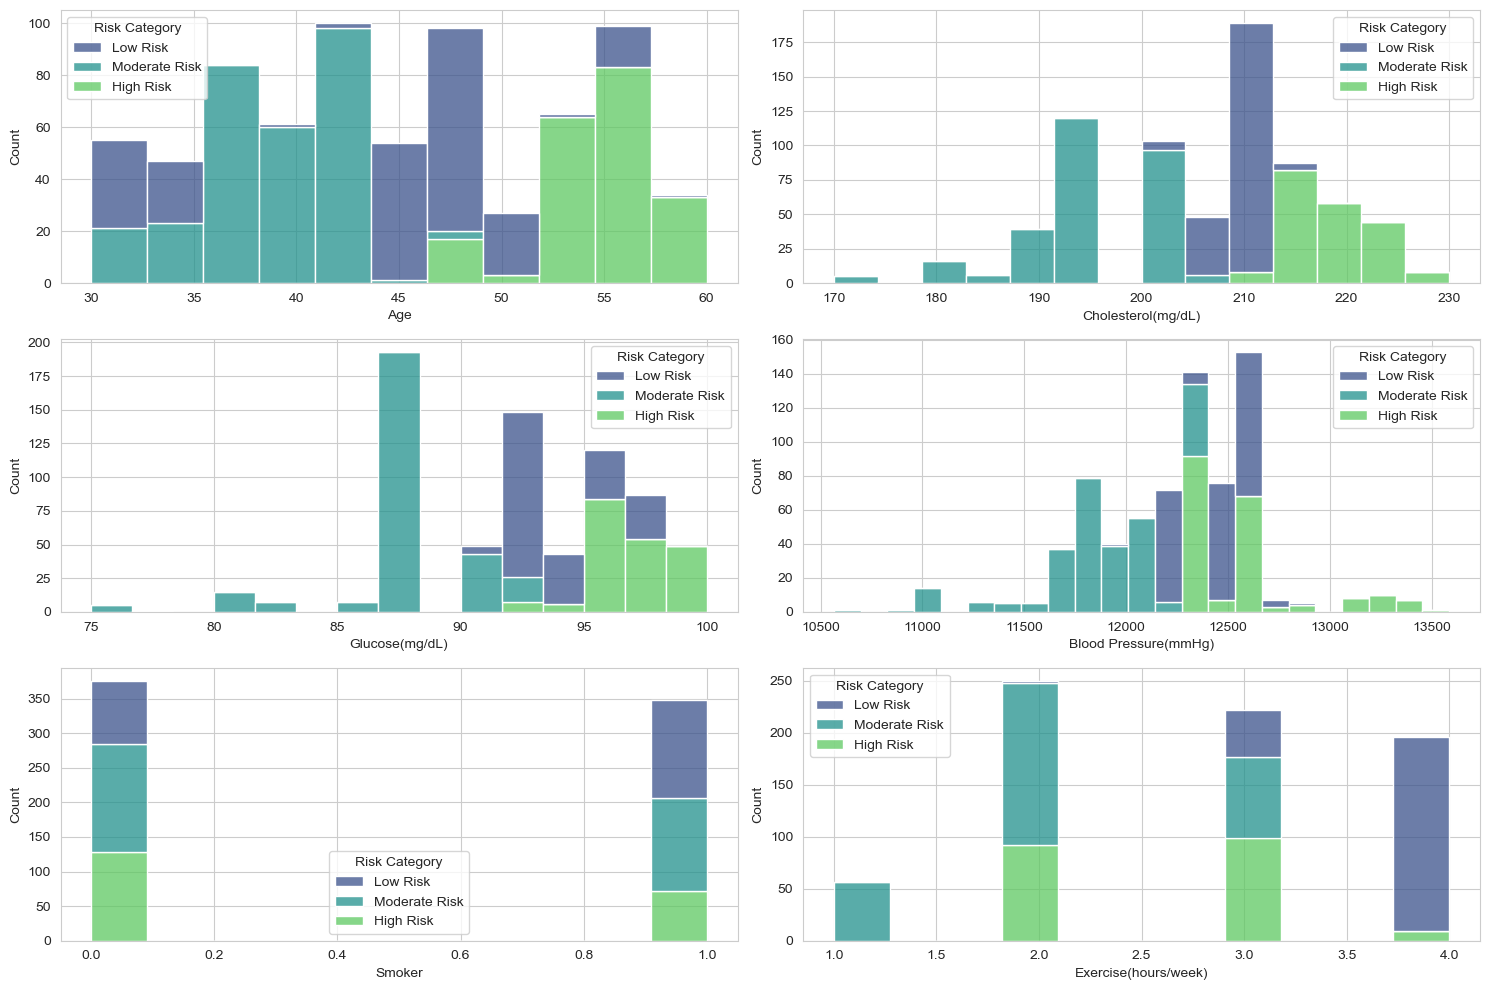

In [43]:
risk_order = ['Low Risk', 'Moderate Risk', 'High Risk']

# Define the size of the overall figure
plt.figure(figsize=(15, 10))

# List of variables to plot
variables = ['Age', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Blood Pressure(mmHg)', 'Smoker', 'Exercise(hours/week)']

# Create a subplot for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Adjust the grid parameters based on your number of variables
    sns.histplot(df, x=var, hue='Risk Category', multiple='stack', palette='viridis', hue_order=risk_order)

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()